In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

sns.set_style('whitegrid')
sns.set_context("paper")


In [2]:
df = pd.read_csv("results/gnn.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'Fig2.csv'

In [3]:
from matplotlib import rcParams
rcParams['font.family'] = 'Georgia'

In [4]:
df['diff'] = abs(df['predicted']-df['observed'])
top_diff=df.sort_values(by='diff',ascending=False)[:20]['mol'].tolist()


findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: F

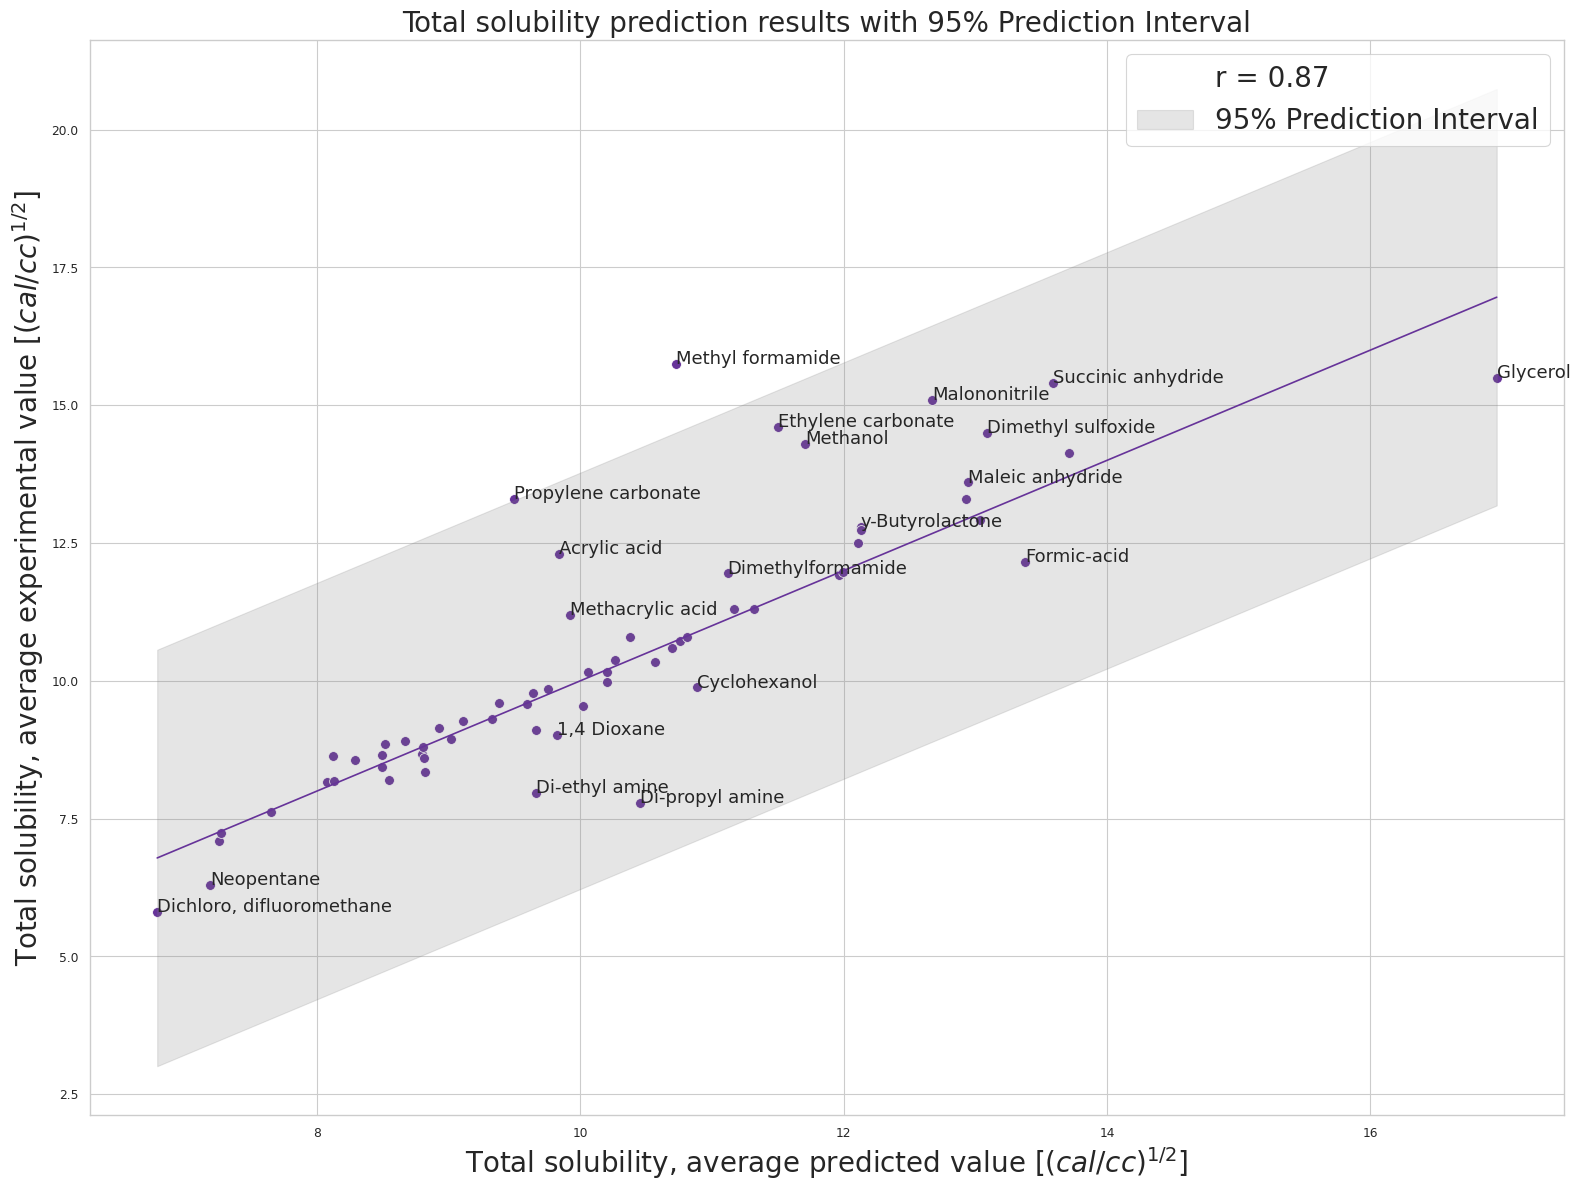

findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: F

In [10]:
df = df.sort_values(by='predicted')  # Sort the DataFrame by 'predicted'

z_score = 1.96
df['lower_bound'] = df['predicted'] - z_score * df['predicted'].std()
df['upper_bound'] = df['predicted'] + z_score * df['predicted'].std()

# Create the scatter plot with prediction interval
fig,ax=plt.subplots(figsize=(16, 12))
ax=sns.scatterplot(x='predicted', y='observed', data=df,color='rebeccapurple',s=50)#rebeccapurple
for i, row in df.iterrows():
    if row['mol'] in top_diff:
        plt.annotate(row['mol'], (row['predicted'], row['observed']),fontsize=13)
        
    #if row['predicted']>row['observed']+0.8 or  row['predicted']<row['observed']-0.8:
    #    plt.annotate(row['mol'], (row['predicted'], row['observed']))
    
#sns.regplot(x='predicted', y='observed', data=df, scatter_kws={'alpha':0.5}, ci=95)
fig.set_tight_layout(True)
ax.plot([], [], ' ',color='white', label="r = 0.87")
ax=sns.lineplot(x='predicted',y='predicted',data=df, color='rebeccapurple')
ax.lines[0].set_linestyle("--")
ax.fill_between(df['predicted'], df['lower_bound'], df['upper_bound'], color='grey', alpha=0.2, label='95% Prediction Interval')
plt.title('Total solubility prediction results with 95% Prediction Interval',fontsize=20)
plt.xlabel(r'Total solubility, average predicted value [$(cal/cc)^{1/2}$]',fontsize=20)
plt.ylabel(r'Total solubility, average experimental value [$(cal/cc)^{1/2}$]',fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
fig.savefig('Fig2_conf.png',dpi=300)




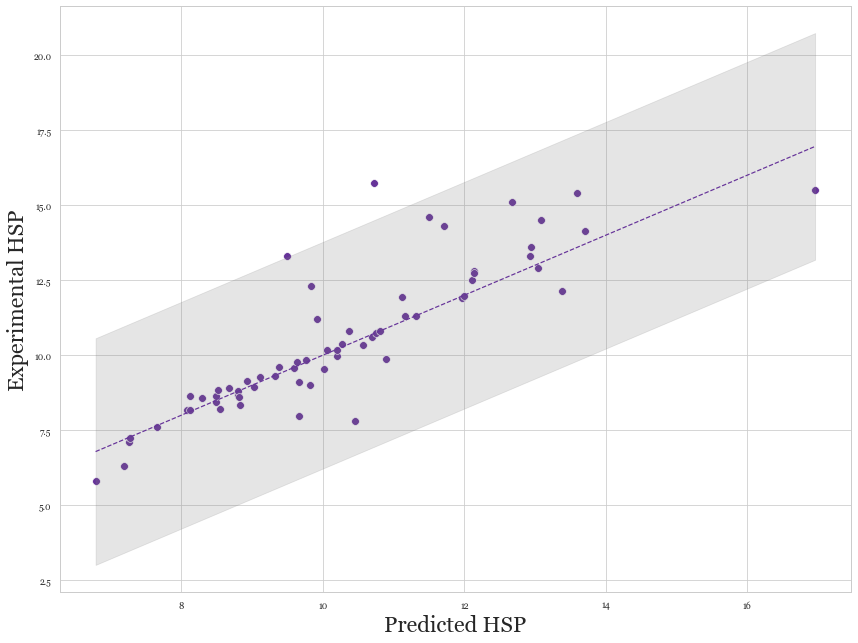

In [12]:
df = df.sort_values(by='predicted')  # Sort the DataFrame by 'predicted'

z_score = 1.96
df['lower_bound'] = df['predicted'] - z_score * df['predicted'].std()
df['upper_bound'] = df['predicted'] + z_score * df['predicted'].std()

# Create the scatter plot with prediction interval
fig,ax=plt.subplots(figsize=(12, 9))
ax=sns.scatterplot(x='predicted', y='observed', data=df,color='rebeccapurple',s=60)#rebeccapurple
#for i, row in df.iterrows():
#    if row['mol'] in top_diff:
#        plt.annotate(row['mol'], (row['predicted'], row['observed']))
        
    #if row['predicted']>row['observed']+0.8 or  row['predicted']<row['observed']-0.8:
    #    plt.annotate(row['mol'], (row['predicted'], row['observed']))
    
#sns.regplot(x='predicted', y='observed', data=df, scatter_kws={'alpha':0.5}, ci=95)
fig.set_tight_layout(True)

ax=sns.lineplot(x='predicted',y='predicted',data=df, color='rebeccapurple')
ax.lines[0].set_linestyle("--")
ax.fill_between(df['predicted'], df['lower_bound'], df['upper_bound'], color='grey', alpha=0.2, label='95% Prediction Interval')
#plt.title('Total solubility prediction results with 95% Prediction Interval',fontsize=22)
plt.xlabel(r'Predicted HSP',fontsize=22)
plt.ylabel(r'Experimental HSP',fontsize=22)
#plt.legend(fontsize=11)
plt.grid(True)
plt.show()
fig.savefig('Fig.png',dpi=300)




In [11]:
df = pd.read_csv('Fig3.csv')


In [12]:
D = df[['D observed','D predicted']]
P = df[['P observed','P predicted']]
H = df[['H observed','H predicted']]
T = df[['pred total','true total']]


In [13]:
D = df[['D observed','D predicted']]
P = df[['P observed','P predicted']]
H = df[['H observed','H predicted']]
T = df[['pred total','true total']]

D = D.sort_values(by='D predicted')  # Sort the DataFrame by 'predicted'
P = P.sort_values(by='P predicted')  # Sort the DataFrame by 'predicted'
H = H.sort_values(by='H predicted')  # Sort the DataFrame by 'predicted'
T = T.sort_values(by='pred total')  # Sort the DataFrame by 'predicted'


z_score = 1.96
D['lower_bound'] = D['D predicted'] - z_score * D['D predicted'].std()
D['upper_bound'] = D['D predicted'] + z_score * D['D predicted'].std()

P['lower_bound'] = P['P predicted'] - z_score * P['P predicted'].std()
P['upper_bound'] = P['P predicted'] + z_score * P['P predicted'].std()

H['lower_bound'] = H['H predicted'] - z_score * H['H predicted'].std()
H['upper_bound'] = H['H predicted'] + z_score * H['H predicted'].std()

T['lower_bound'] = T['pred total'] - z_score * T['pred total'].std()
T['upper_bound'] = T['pred total'] + z_score * T['pred total'].std()


findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: Font family 'Georgia' not found.
findfont: F

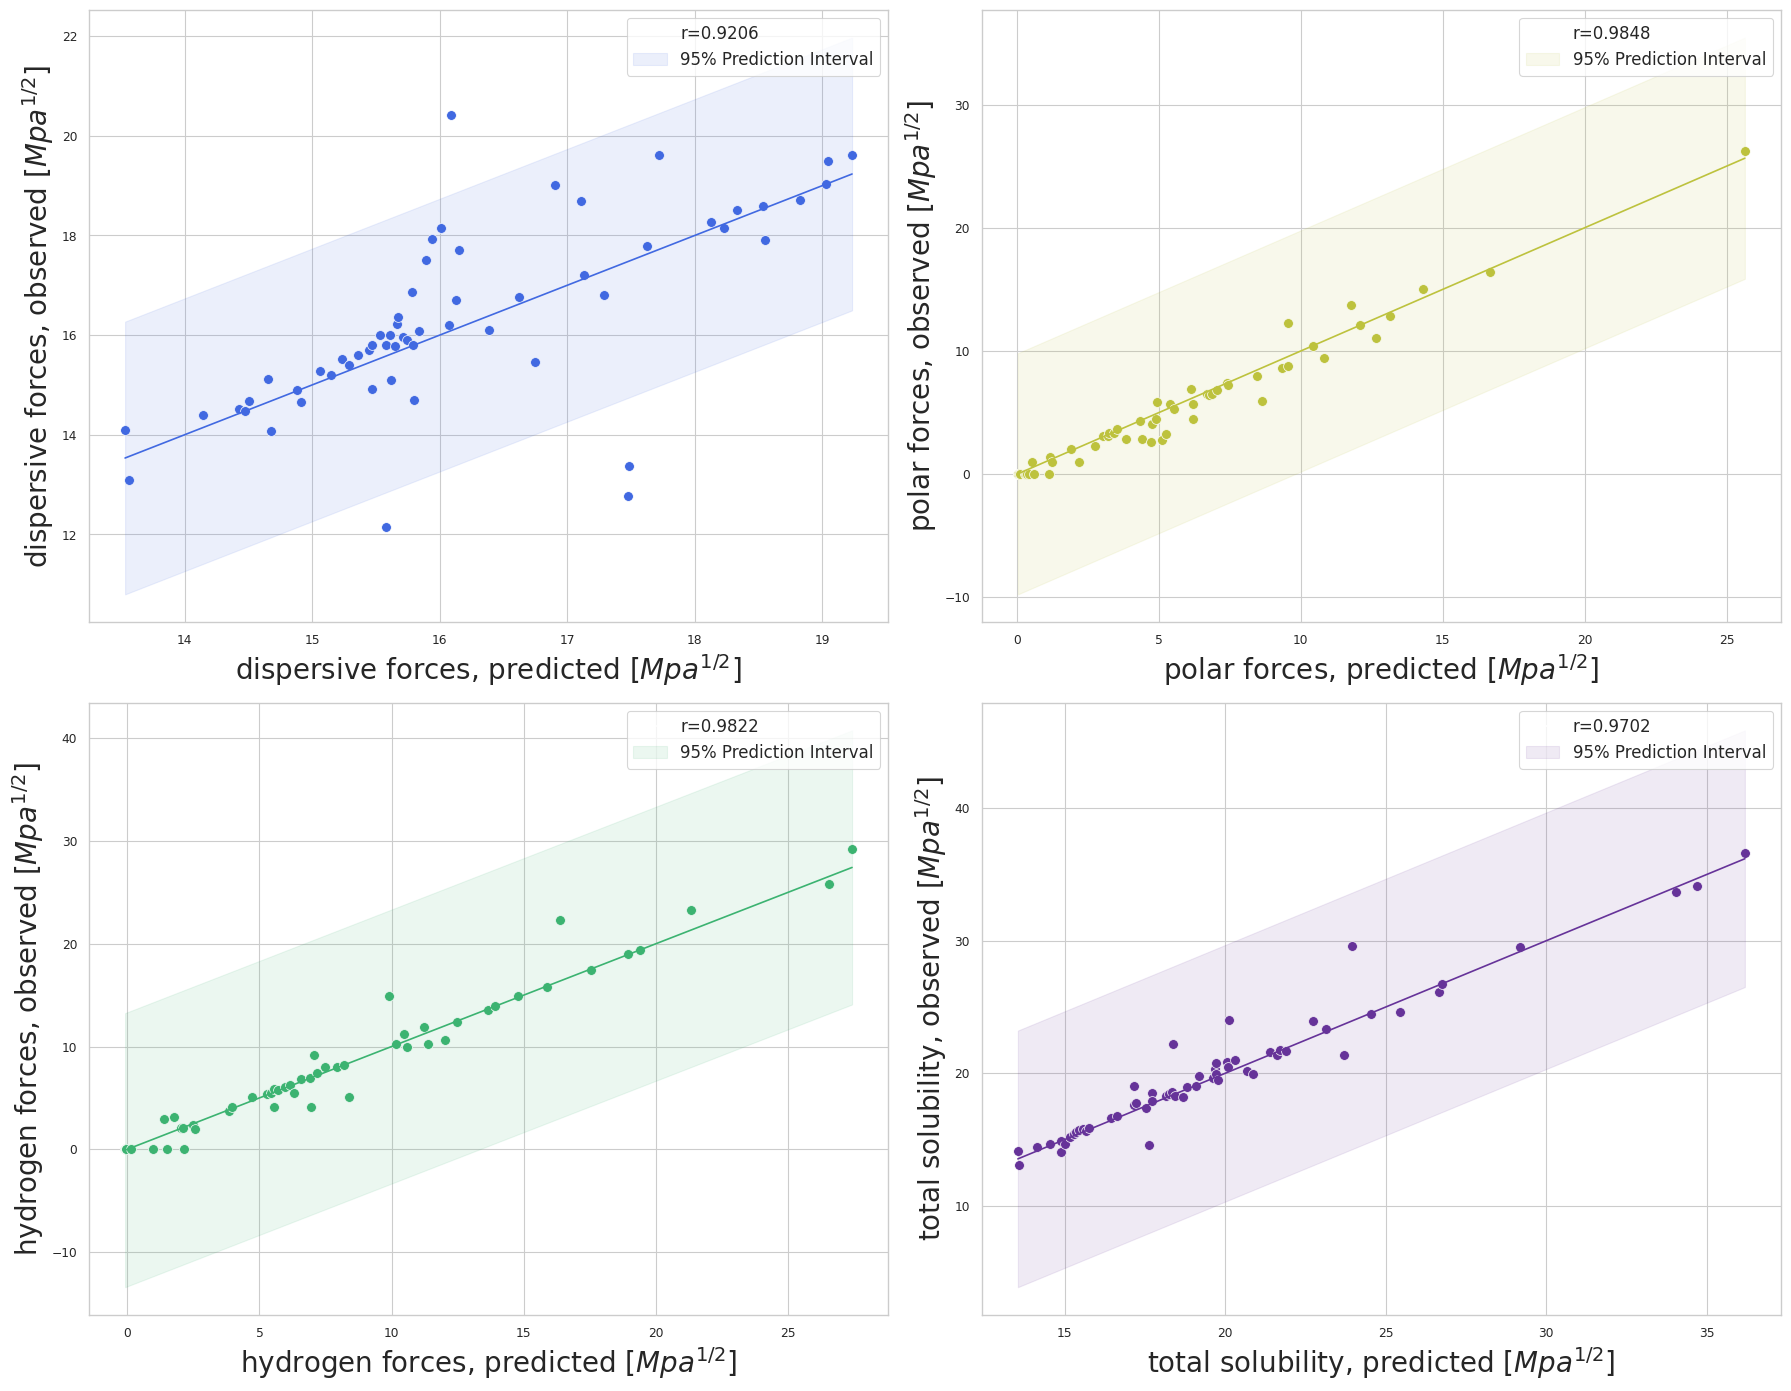

In [14]:
fig,axs = plt.subplots(2,2,figsize=(18,14))
fig.set_tight_layout(True)

axs[0,0].plot([], [], ' ',color='white', label="r=0.9206")
axs[0,1].plot([], [], ' ',color='white',  label="r=0.9848")
axs[1,0].plot([], [], ' ',color='white',  label="r=0.9822")
axs[1,1].plot([], [], ' ',color='white',  label="r=0.9702")

sns.scatterplot(x='D predicted', y='D observed', data=D,color='royalblue',ax=axs[0,0],s=50)#rebeccapurple
axs[0,0].fill_between(D['D predicted'], D['lower_bound'], D['upper_bound'], color='royalblue', alpha=0.1, label='95% Prediction Interval')
sns.lineplot(x='D predicted',y='D predicted',data=D, color='royalblue',ax=axs[0,0])
axs[0,0].lines[0].set_linestyle("--")

sns.scatterplot(x='P predicted', y='P observed', data=P,color='#bdc23d',ax=axs[0,1],s=50)#rebeccapurple
axs[0,1].fill_between(P['P predicted'], P['lower_bound'], P['upper_bound'], color='#bdc23d', alpha=0.1, label='95% Prediction Interval')
sns.lineplot(x='P predicted',y='P predicted',data=P, color='#bdc23d',ax=axs[0,1])
axs[0,1].lines[0].set_linestyle("--")

sns.scatterplot(x='H predicted', y='H observed', data=H,color='mediumseagreen',ax=axs[1,0],s=50)#rebeccapurple
axs[1,0].fill_between(H['H predicted'], H['lower_bound'], H['upper_bound'], color='mediumseagreen', alpha=0.1, label='95% Prediction Interval')
sns.lineplot(x='H predicted',y='H predicted',data=H, color='mediumseagreen',ax=axs[1,0])
axs[1,0].lines[0].set_linestyle("--")


sns.scatterplot(x='pred total', y='true total', data=T,color='rebeccapurple',ax=axs[1,1],s=50)#rebeccapurple
axs[1,1].fill_between(T['pred total'], T['lower_bound'], T['upper_bound'], color='rebeccapurple', alpha=0.1, label='95% Prediction Interval')
sns.lineplot(x='pred total',y='pred total',data=T, color='rebeccapurple',ax=axs[1,1])
axs[1,1].lines[0].set_linestyle("--")

axs[0,0].set_xlabel(r'dispersive forces, predicted [$Mpa^{1/2}$]',fontsize=20)
axs[0,0].set_ylabel(r'dispersive forces, observed [$Mpa^{1/2}$]',fontsize=20)

axs[0,1].set_xlabel(r'polar forces, predicted [$Mpa^{1/2}$]',fontsize=20)
axs[0,1].set_ylabel(r'polar forces, observed [$Mpa^{1/2}$]',fontsize=20)

axs[1,0].set_xlabel(r'hydrogen forces, predicted [$Mpa^{1/2}$]',fontsize=20)
axs[1,0].set_ylabel(r'hydrogen forces, observed [$Mpa^{1/2}$]',fontsize=20)

axs[1,1].set_xlabel(r'total solubility, predicted [$Mpa^{1/2}$]',fontsize=20)
axs[1,1].set_ylabel(r'total solubility, observed [$Mpa^{1/2}$]',fontsize=20)


axs[0,0].legend(fontsize=12)
axs[0,1].legend(fontsize=12)
axs[1,0].legend(fontsize=12)
axs[1,1].legend(fontsize=12)
''' 
ax=sns.lineplot(x='predicted',y='predicted',data=df, color='rebeccapurple')
ax.lines[0].set_linestyle("--")
ax.fill_between(df['predicted'], df['lower_bound'], df['upper_bound'], color='grey', alpha=0.2, label='95% Prediction Interval')
plt.title('Total solubility prediction results with 95% Prediction Interval, r = 0.87',fontsize=20)
plt.xlabel(r'Total solubility, average predicted value [$(cal/cc)^{1/2}$]',fontsize=20)
plt.ylabel(r'Total solubility, average experimental value [$(cal/cc)^{1/2}$]',fontsize=20)
plt.legend()
'''
fig.savefig('Fig3_conf.png',dpi=300)

In [ ]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
fig.suptitle('Hansen solubility parameters XGBOOST predictions and true values')
colors = ['b','y','g']